Вспомогательная табица для анализа. Сделана на прямую, не успела разобраться как работает generate_series..

In [1]:
import sqlite3
import pandas as pd
sql = sqlite3.connect('data/children_hobbies')

data3 = [ '2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01',
        '2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
        '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01',
        '2021-01-01','2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01','2021-12-01',
        '2022-01-01','2022-02-01','2022-03-01','2022-04-01','2022-05-01','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-01','2022-11-01','2022-12-01',
        '2023-01-01','2023-02-01','2023-03-01','2023-04-01','2023-05-01','2023-06-01','2023-07-01','2023-08-01','2023-09-01','2023-10-01','2023-11-01','2023-12-01'
        ]

data4 = ['2018-01-31','2018-02-28','2018-03-31','2018-04-30','2018-05-31','2018-06-30','2018-07-31','2018-08-31','2018-09-30','2018-10-31','2018-11-30','2018-12-31',
          '2019-01-31','2019-02-28','2019-03-31','2019-04-30','2019-05-31','2019-06-30','2019-07-31','2019-08-31','2019-09-30','2019-10-31','2019-11-30','2019-12-31',
          '2020-01-31','2020-02-28','2020-03-31','2020-04-30','2020-05-31','2020-06-30','2020-07-31','2020-08-31','2020-09-30','2020-10-31','2020-11-30','2020-12-31',
          '2021-01-31','2021-02-28','2021-03-31','2021-04-30','2021-05-31','2021-06-30','2021-07-31','2021-08-31','2021-09-30','2021-10-31','2021-11-30','2021-12-31',
          '2022-01-31','2022-02-28','2022-03-31','2022-04-30','2022-05-31','2022-06-30','2022-07-31','2022-08-31','2022-09-30','2022-10-31','2022-11-30','2022-12-31',
          '2023-01-31','2023-02-28','2023-03-31','2023-04-30','2023-05-31','2023-06-30','2023-07-31','2023-08-31','2023-09-30','2023-10-31','2023-11-30','2023-12-31'
         ]
date_period_df = pd.DataFrame({'date1': data3, 'date2': data4 })
date_period_df['date1'] = pd.to_datetime(date_period_df['date1'])
date_period_df['date2'] = pd.to_datetime(date_period_df['date2'])
date_period_df.to_sql('date_period', sql, index_label="id", if_exists='replace')

72

График наград в зависмости от вида увлечения

[Text(0.5, 0, 'Увлечение'), Text(0, 0.5, 'Количество наград')]

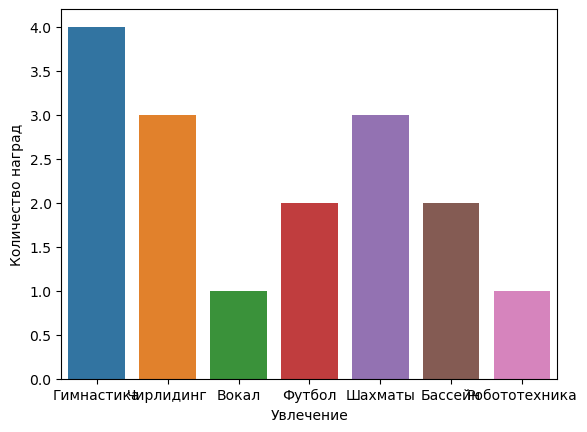

In [80]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sql = sqlite3.connect('data/children_hobbies')
query = """
SELECT  hobbies.name as 'Увлечение', year
FROM achievement
JOIN children_hobbies ON achievement.child_hobby_id = children_hobbies.id
JOIN children on children_hobbies.child_id = children.id
JOIN hobbies on children_hobbies.hobby_id = hobbies.id


"""
df = pd.read_sql(query, sql)

ax = sns.countplot( x='Увлечение', data = df)
ax.set(xlabel='Увлечение', ylabel='Количество наград')



Изменение стоимости кружков по годам

[Text(0.5, 0, 'Увлечение'),
 Text(0, 0.5, 'Цена'),
 Text(0.5, 1.0, 'Стоимость кружка')]

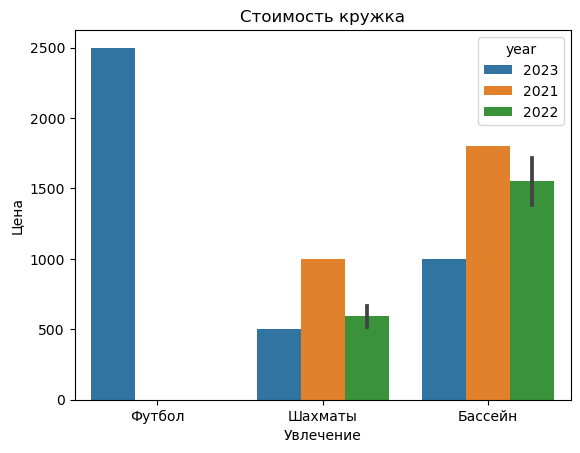

In [86]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sql = sqlite3.connect('data/children_hobbies')
query = """
SELECT children.name as child_name, hobbies.name as hobby_name , children_hobbies_price.price, strftime('%Y', date_period.date1) as year
   
FROM children_hobbies_period
JOIN children_hobbies ON children_hobbies_period.child_hobby_id = children_hobbies.id
JOIN children on children_hobbies.child_id = children.id
JOIN hobbies on children_hobbies.hobby_id = hobbies.id
left join date_period on date_period.date1>= children_hobbies_period.begin and date_period.date1<=children_hobbies_period.end
left join children_hobbies_price on children_hobbies_period.child_hobby_id = children_hobbies_price.child_hobby_id and
                 date_period.date1>=children_hobbies_price.price_begin and  date_period.date2<=children_hobbies_price.price_end     
where date_period.date1>= date('2021-01-01')


"""
df = pd.read_sql(query, sql)

ax = sns.barplot( x='hobby_name', y = 'price', hue = 'year', data = df)
ax.set(xlabel='Увлечение', ylabel='Цена',  title = 'Стоимость кружка')

Сколько денег истрачего на кружки на мальчиков в этом учебном году 

[Text(0.5, 0, 'Увлечение'),
 Text(0, 0.5, 'Суммарная стоимость'),
 Text(0.5, 1.0, 'Истрачено денег')]

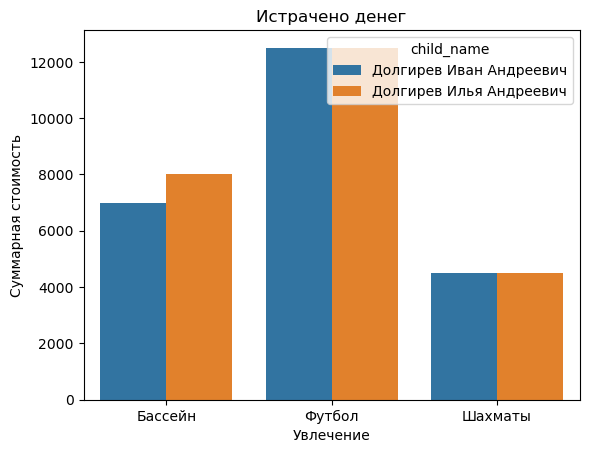

In [84]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sql = sqlite3.connect('data/children_hobbies')
query = """
SELECT children.name as child_name, hobbies.name as hobby_name , sum(children_hobbies_price.price) as sum,
strftime('%Y', date_period.date1) as year
  
FROM children_hobbies_period
JOIN children_hobbies ON children_hobbies_period.child_hobby_id = children_hobbies.id
JOIN children on children_hobbies.child_id = children.id
JOIN hobbies on children_hobbies.hobby_id = hobbies.id
left join date_period on date_period.date1>= children_hobbies_period.begin and date_period.date1<=children_hobbies_period.end
left join children_hobbies_price on children_hobbies_period.child_hobby_id = children_hobbies_price.child_hobby_id and
                 date_period.date1>=children_hobbies_price.price_begin and  date_period.date2<=children_hobbies_price.price_end     
where date_period.date1>= date('2022-09-01') 
group by child_name, hobby_name, year
"""
df = pd.read_sql(query, sql)
df
ax = sns.barplot( x='hobby_name', y = 'sum', hue = 'child_name', data = df)
ax.set(xlabel='Увлечение', ylabel='Суммарная стоимость', title = 'Истрачено денег')